# Predictive Analytics for Disease Diagnosis and Treatment Cost Estimation

Project Overview

This project aims to build a comprehensive system that predicts diseases based on patient data, suggests suitable insurance policies, and estimates treatment costs. It leverages advanced machine learning techniques for accurate predictions and efficient data processing.

Objectives

Disease Detection: Use patient data to detect potential diseases using machine learning algorithms.

Insurance Policy Prediction: Recommend appropriate insurance policies based on patient profiles.

Cost Estimation: Estimate treatment costs using predictive models.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, f1_score, mean_squared_error, r2_score
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Load datasets
diabetes_data = pd.read_csv("D:/education/Portfolio_Dataset/Healthcare_&_Insu/diabetes.csv")
heart_data = pd.read_csv("D:/education/Portfolio_Dataset/Healthcare_&_Insu/heart.csv")
insurance_data = pd.read_csv('D:/education/Portfolio_Dataset/Healthcare_&_Insu/insurance.csv')

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#Getting Information about the Dataset
print(diabetes_data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [7]:
print(heart_data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [8]:
print(insurance_data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [9]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
#Checking Missing Values

diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
# No missing values, so no need to fill or drop them
# Remove outliers using Z-score
z_scores = np.abs(stats.zscore(diabetes_data.drop('Outcome', axis=1)))
diabetes_data_clean = diabetes_data[(z_scores < 3).all(axis=1)]
print(diabetes_data_clean.shape)

(688, 9)


In [19]:

# Normalize numerical features
scaler = StandardScaler()
diabetes_data_scaled = scaler.fit_transform(diabetes_data_clean.drop('Outcome', axis=1))

# Convert scaled data back to DataFrame
diabetes_data_scaled = pd.DataFrame(diabetes_data_scaled, columns=diabetes_data_clean.columns[:-1])
diabetes_data_scaled['Outcome'] = diabetes_data_clean['Outcome'].values

diabetes_data_scaled.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.657355,0.924040,-0.028115,0.923219,-0.805266,0.210285,0.606516,1.479220,1
1,-0.868490,-1.177082,-0.515765,0.533462,-0.805266,-0.848063,-0.364220,-0.183265,0
2,1.267694,2.091330,-0.678315,-1.350366,-0.805266,-1.346999,0.764788,-0.095766,1
3,-0.868490,-1.043678,-0.515765,0.143704,0.238698,-0.621274,-1.011378,-1.058257,0
4,0.352186,-0.143197,0.134435,-1.350366,-0.805266,-0.999256,-0.891795,-0.270764,0


In [20]:
# Remove outliers using IQR method
Q1 = heart_data.quantile(0.25)
Q3 = heart_data.quantile(0.75)
IQR = Q3 - Q1
heart_data_clean = heart_data[~((heart_data < (Q1 - 1.5 * IQR)) | (heart_data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(heart_data_clean.shape)


(769, 14)


In [21]:
# Normalize numerical features
heart_data_scaled = scaler.fit_transform(heart_data_clean.drop('target', axis=1))

# Convert scaled data back to DataFrame
heart_data_scaled = pd.DataFrame(heart_data_scaled, columns=heart_data_clean.columns[:-1])
heart_data_scaled['target'] = heart_data_clean['target'].values

heart_data_scaled.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.155300,0.667449,-0.907835,-0.240805,-0.675971,0.0,0.870574,0.768418,-0.691987,0.026266,0.952814,2.134054,1.175946,0
1,1.797168,0.667449,-0.907835,1.066034,-1.530053,0.0,0.870574,-1.138183,1.445114,1.550693,-2.439380,-0.702744,1.175946,0
2,0.820934,0.667449,-0.907835,1.262060,-0.878254,0.0,0.870574,0.458041,-0.691987,-0.926501,0.952814,0.715655,1.175946,0
3,0.495523,-1.498241,-0.907835,-1.874354,0.133160,0.0,-1.069923,-1.271202,-0.691987,0.026266,-0.743283,-0.702744,-0.583397,1
4,0.170111,0.667449,-0.907835,2.046163,1.054670,0.0,-1.069923,-0.251392,1.445114,-0.164287,-0.743283,0.715655,1.175946,0


In [22]:
# Remove outliers using Z-score
z_scores = np.abs(stats.zscore(insurance_data.select_dtypes(include=[np.number])))
insurance_data_clean = insurance_data[(z_scores < 3).all(axis=1)]
print(insurance_data_clean.shape)


(1309, 7)


In [23]:
# Encode categorical features using one-hot encoding
insurance_data_encoded = pd.get_dummies(insurance_data, drop_first=True)
insurance_data_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [24]:
# Remove outliers using Z-score
z_scores = np.abs(stats.zscore(insurance_data_encoded))
insurance_data_clean = insurance_data_encoded[(z_scores < 3).all(axis=1)]
print(insurance_data_clean.shape)


(1309, 9)


In [25]:

# Normalize numerical features
scaler = StandardScaler()
insurance_data_scaled = scaler.fit_transform(insurance_data_clean.drop('charges', axis=1))

# Convert scaled data back to DataFrame
insurance_data_scaled = pd.DataFrame(insurance_data_scaled, columns=insurance_data_clean.columns[:-1])
insurance_data_scaled['charges'] = insurance_data_clean['charges'].values

insurance_data_scaled.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast
0,-1.439063,-0.449359,-0.929616,16884.92400,1.984848,-0.571175,-0.606478,1.776388
1,-1.510086,0.533391,-0.040093,1725.55230,-0.503817,-0.571175,1.648863,-0.562940
2,-0.799859,0.404478,1.738954,4449.46200,-0.503817,-0.571175,1.648863,-0.562940
3,-0.444746,-1.319101,-0.929616,21984.47061,-0.503817,1.750776,-0.606478,-0.562940
4,-0.515769,-0.285288,-0.929616,3866.85520,-0.503817,1.750776,-0.606478,-0.562940


In [26]:
diabetes_data_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,6.880000e+02,688.000000
mean,6.454785e-17,-1.420053e-16,-5.292924e-16,1.019856e-16,2.452818e-17,-5.460748e-16,8.649412e-17,3.679227e-17,0.329942
std,1.000728e+00,1.000728e+00,1.000728e+00,1.000728e+00,1.000728e+00,1.000728e+00,1.000728e+00,1.000728e+00,0.470534
min,-1.173659e+00,-2.544479e+00,-3.929315e+00,-1.350366e+00,-8.052656e-01,-2.118081e+00,-1.324405e+00,-1.058257e+00,0.000000
25%,-8.684899e-01,-7.101662e-01,-6.783154e-01,-1.350366e+00,-8.052656e-01,-7.271091e-01,-7.370395e-01,-7.957595e-01,0.000000
50%,-2.581517e-01,-1.765478e-01,-2.811548e-02,1.437042e-01,-3.221547e-01,-3.162300e-02,-2.973944e-01,-3.582635e-01,0.000000
75%,6.573555e-01,6.238798e-01,6.220845e-01,7.283403e-01,5.940902e-01,6.185054e-01,5.308971e-01,6.042278e-01,1.000000
max,2.793539e+00,2.624949e+00,4.035634e+00,2.547208e+00,3.803724e+00,3.445808e+00,3.539828e+00,3.054206e+00,1.000000


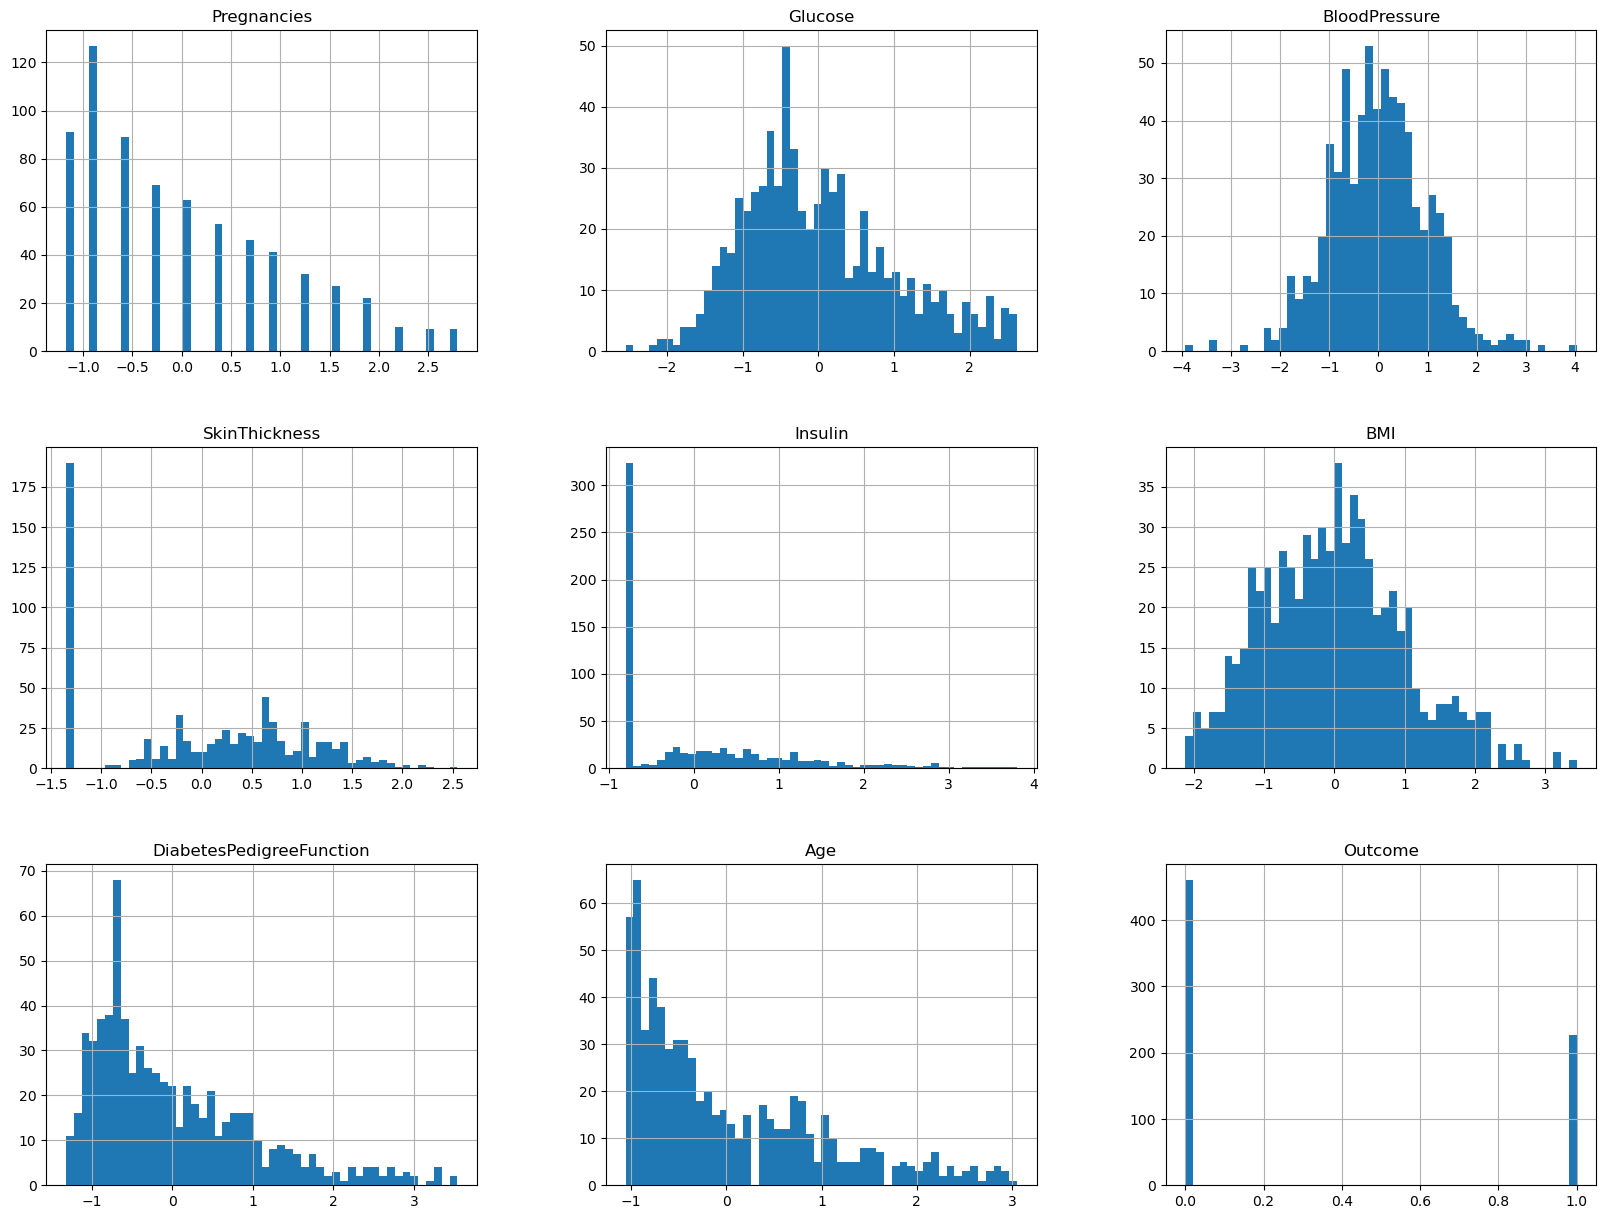

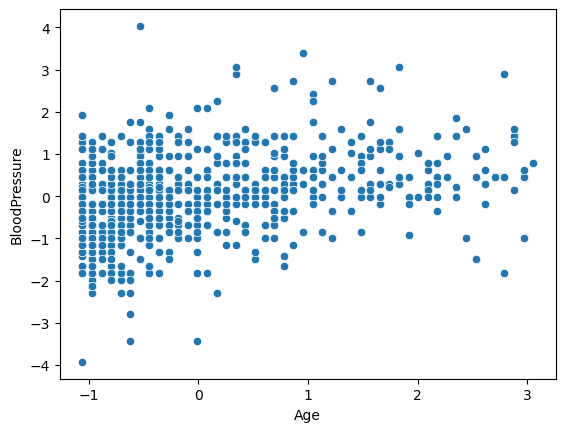

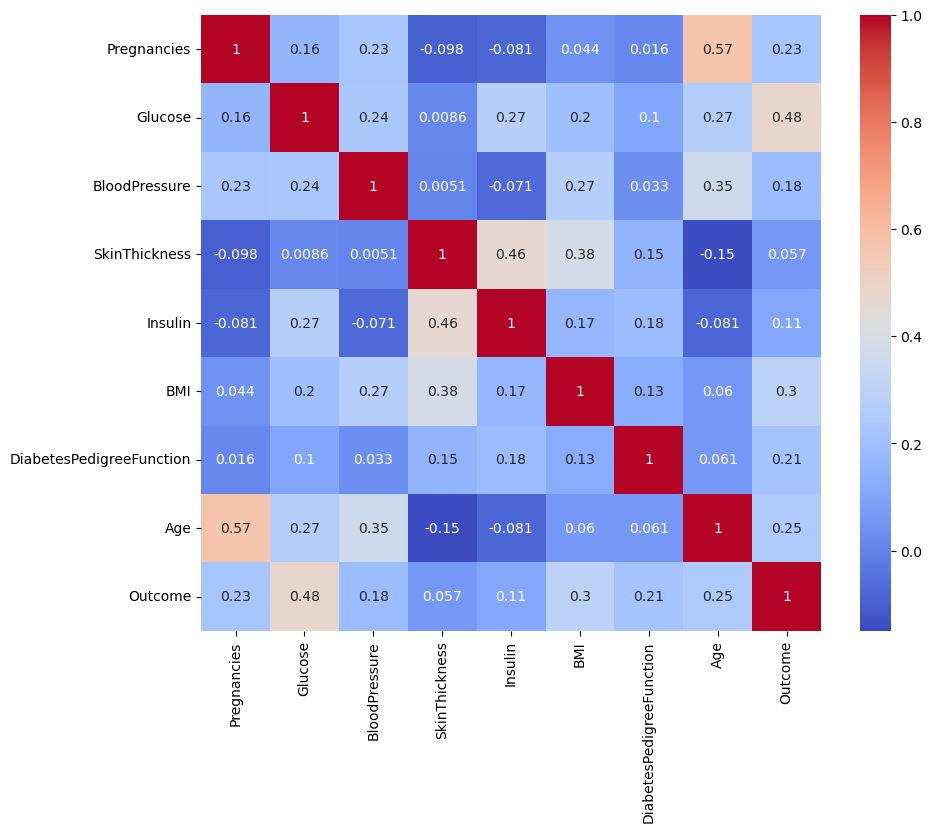

In [27]:
# Histograms
diabetes_data_scaled.hist(bins=50, figsize=(20, 15))
plt.show()

# Scatter Plot
sns.scatterplot(x='Age', y='BloodPressure', data=diabetes_data_scaled)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_data_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()


In [28]:
heart_data_scaled.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,769.0,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,769.000000
mean,2.633351e-16,-6.929871e-17,5.081905e-17,8.177247e-16,2.437005e-16,0.0,1.432173e-16,-4.804710e-16,8.546840e-17,6.929871e-17,-9.239828e-18,-1.062580e-16,-1.385974e-17,0.548765
std,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,0.0,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,0.497940
min,-2.650122e+00,-1.498241e+00,-9.078350e-01,-2.266405e+00,-2.496515e+00,0.0,-1.069923e+00,-2.778747e+00,-6.919871e-01,-9.265009e-01,-2.439380e+00,-7.027439e-01,-2.342740e+00,0.000000
25%,-8.061233e-01,-1.498241e+00,-9.078350e-01,-5.675147e-01,-7.433984e-01,0.0,-1.069923e+00,-7.834669e-01,-6.919871e-01,-9.265009e-01,-7.432831e-01,-7.027439e-01,-5.833973e-01,0.000000
50%,6.164057e-02,6.674494e-01,7.405686e-02,8.590468e-02,-6.912276e-02,0.0,8.705739e-01,1.476640e-01,-6.919871e-01,-3.548407e-01,-7.432831e-01,-7.027439e-01,-5.833973e-01,1.000000
75%,7.124635e-01,6.674494e-01,1.055949e+00,7.393241e-01,6.276288e-01,0.0,8.705739e-01,7.684180e-01,1.445114e+00,5.979264e-01,9.528139e-01,7.156552e-01,1.175946e+00,1.000000
max,2.447991e+00,6.674494e-01,2.037841e+00,2.699582e+00,2.650456e+00,0.0,2.811071e+00,2.275963e+00,1.445114e+00,2.884567e+00,9.528139e-01,2.134054e+00,1.175946e+00,1.000000


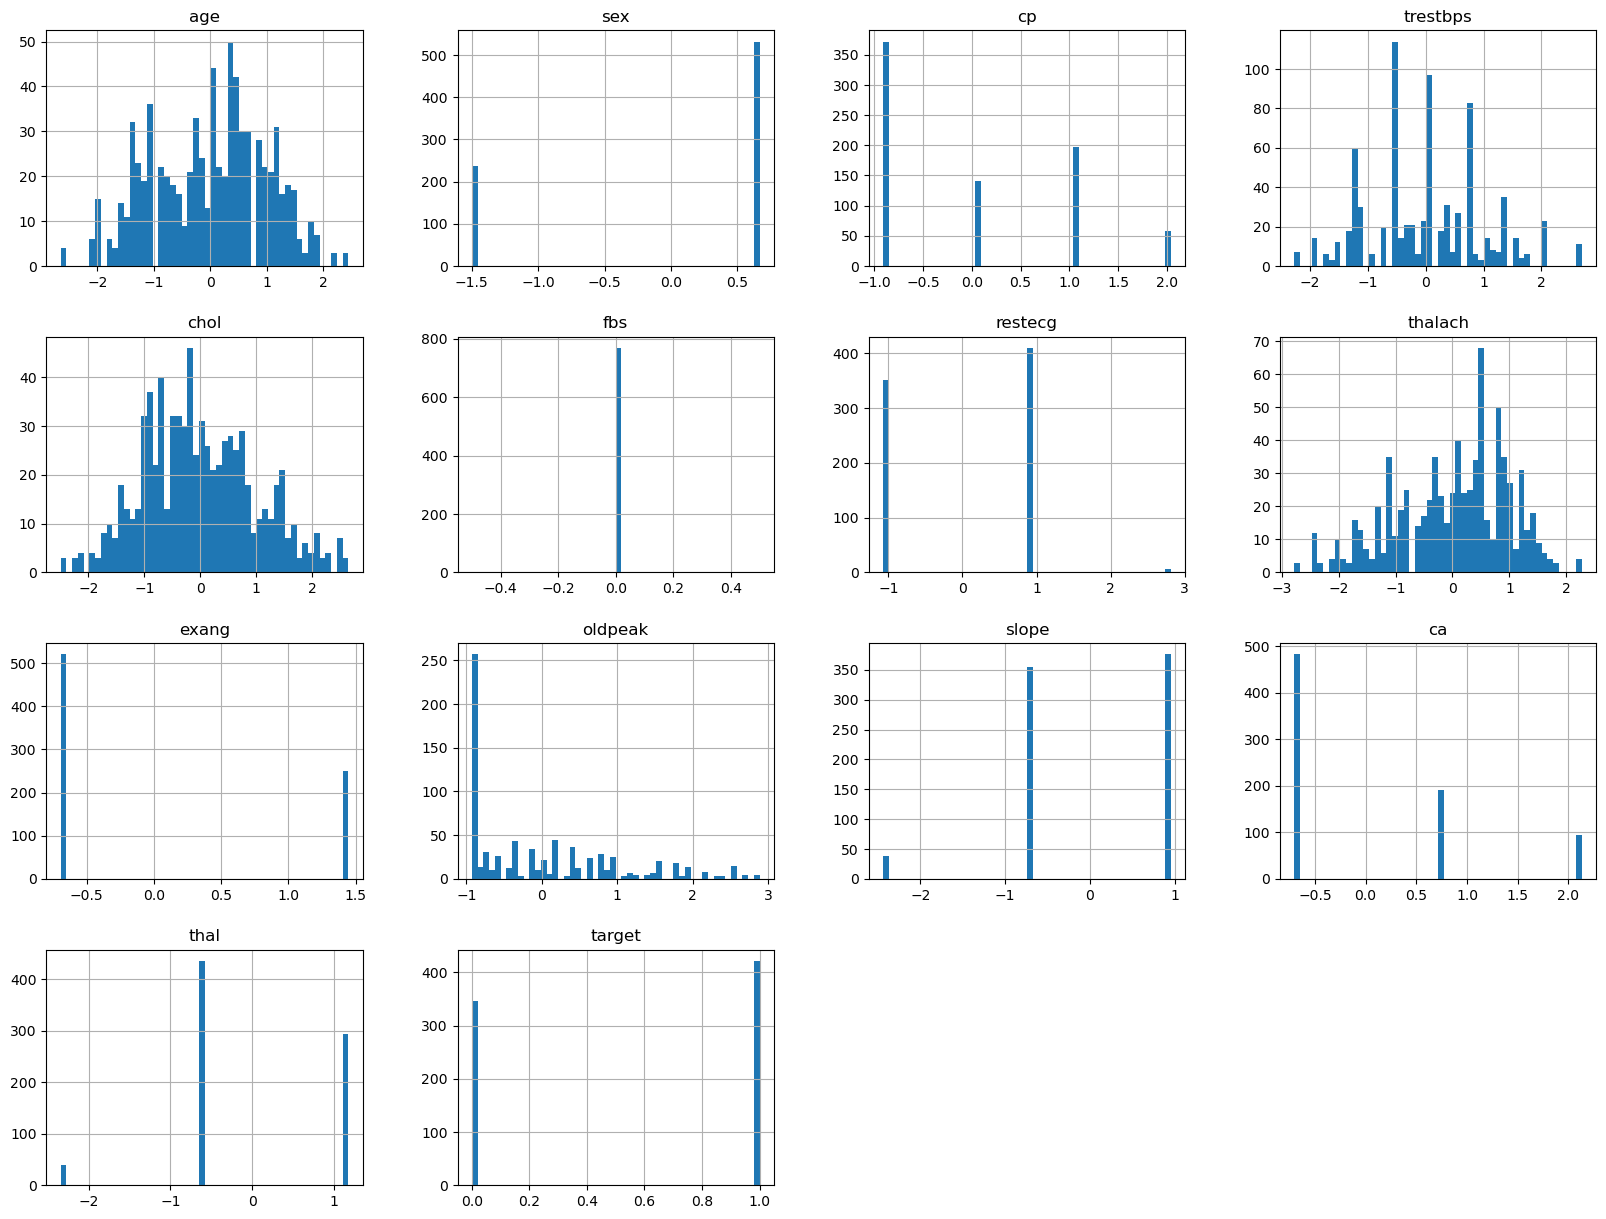

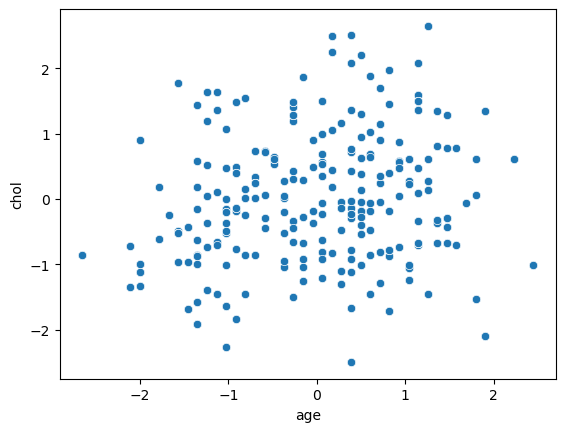

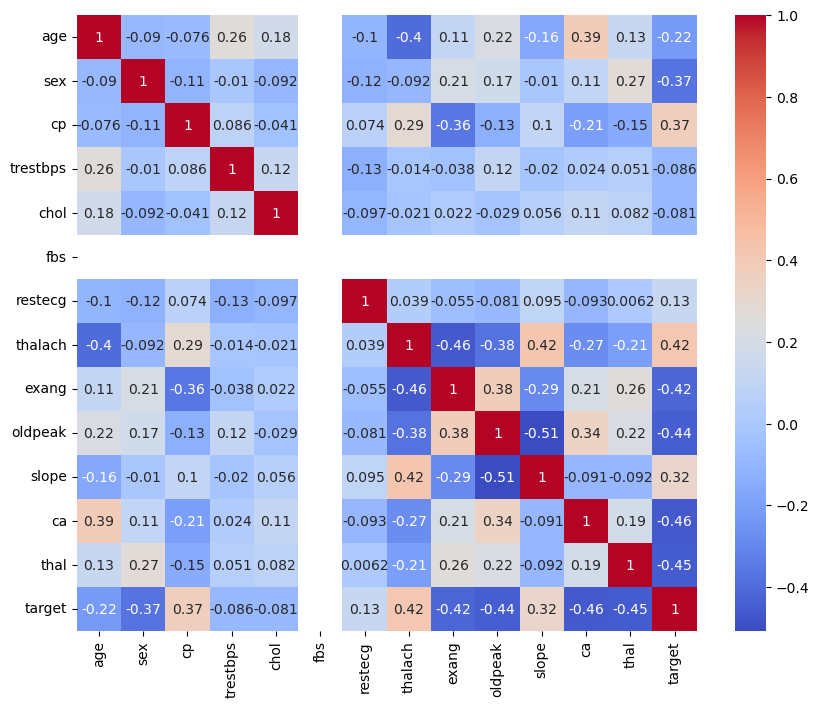

In [29]:
# Histograms
heart_data_scaled.hist(bins=50, figsize=(20, 15))
plt.show()

# Scatter Plot
sns.scatterplot(x='age', y='chol', data=heart_data_scaled)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heart_data_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()


In [30]:
insurance_data_scaled.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast
count,1.309000e+03,1.309000e+03,1.309000e+03,1309.000000,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03
mean,-2.686926e-16,2.985474e-16,-5.292431e-17,13089.622269,2.714067e-17,5.428134e-18,5.699541e-17,8.820718e-17
std,1.000382e+00,1.000382e+00,1.000382e+00,11738.168486,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00
min,-1.510086e+00,-2.448342e+00,-9.296164e-01,1121.873900,-5.038168e-01,-5.711752e-01,-6.064784e-01,-5.629400e-01
25%,-8.708820e-01,-7.147180e-01,-9.296164e-01,4686.388700,-5.038168e-01,-5.711752e-01,-6.064784e-01,-5.629400e-01
50%,-1.861021e-02,-4.671617e-02,-4.009311e-02,9377.904700,-5.038168e-01,-5.711752e-01,-6.064784e-01,-5.629400e-01
75%,8.336616e-01,6.690001e-01,8.494302e-01,16577.779500,-5.038168e-01,-5.711752e-01,1.648863e+00,-5.629400e-01
max,1.756956e+00,2.927483e+00,2.628477e+00,49577.662400,1.984848e+00,1.750776e+00,1.648863e+00,1.776388e+00


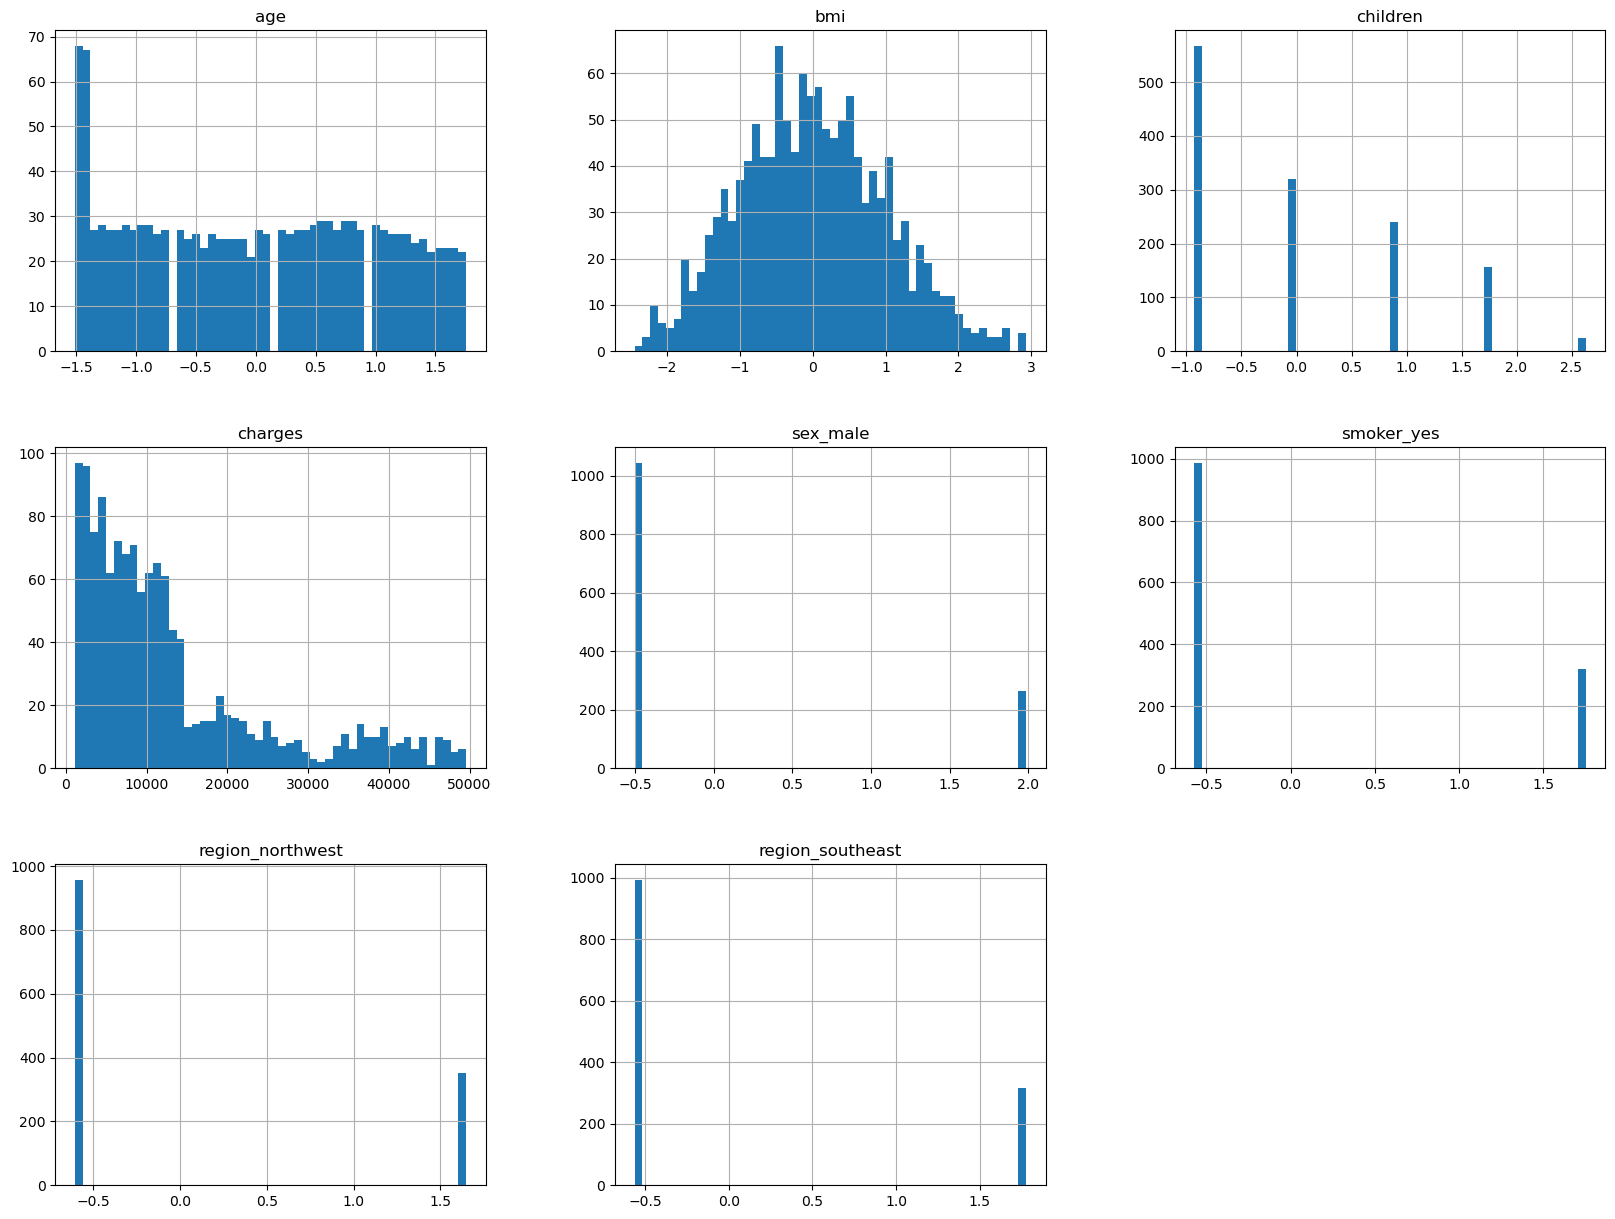

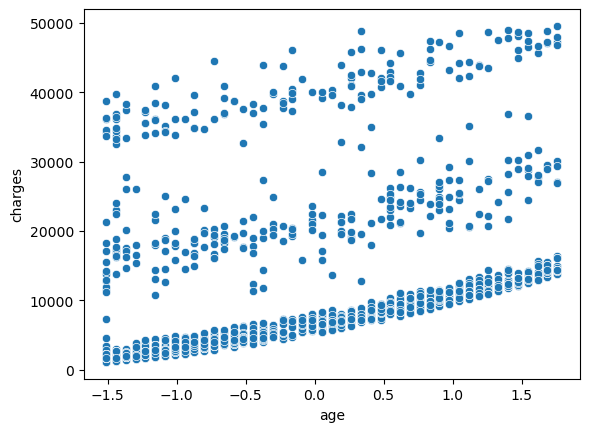

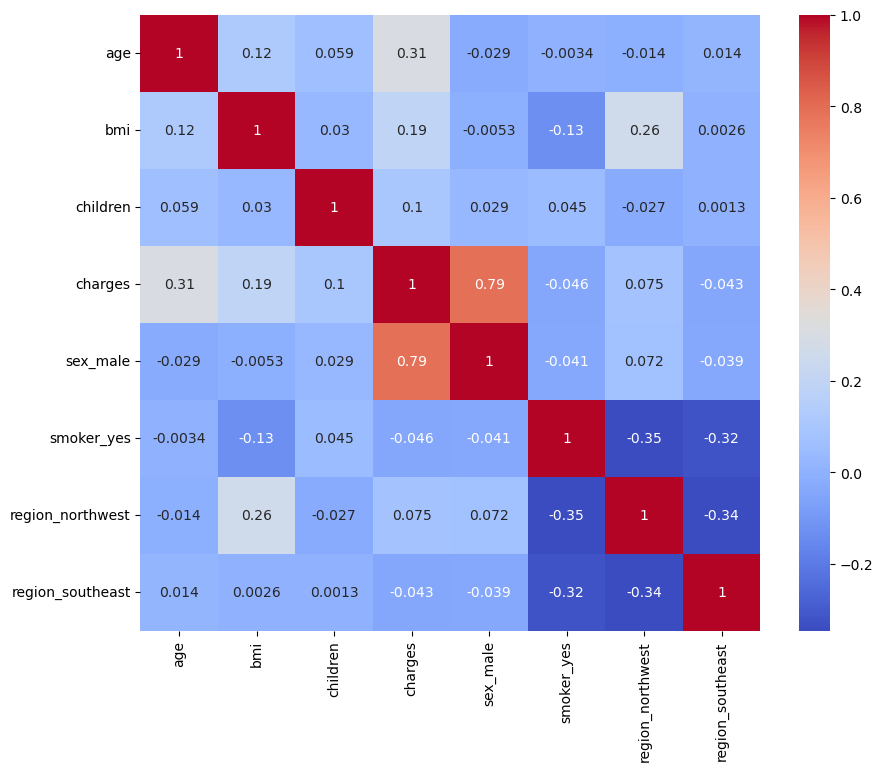

In [31]:
# Histograms
insurance_data_scaled.hist(bins=50, figsize=(20, 15))
plt.show()

# Scatter Plot
sns.scatterplot(x='age', y='charges', data=insurance_data_scaled)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(insurance_data_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()

In [32]:
# Feature Scaling
scaler = StandardScaler()
diabetes_data_scaled = scaler.fit_transform(diabetes_data_clean.drop('Outcome', axis=1))
diabetes_data_scaled = pd.DataFrame(diabetes_data_scaled, columns=diabetes_data_clean.columns[:-1])
diabetes_data_scaled['Outcome'] = diabetes_data_clean['Outcome'].values

In [33]:
heart_data_scaled = scaler.fit_transform(heart_data_clean.drop('target', axis=1))
heart_data_scaled = pd.DataFrame(heart_data_scaled, columns=heart_data_clean.columns[:-1])
heart_data_scaled['target'] = heart_data_clean['target'].values

In [34]:
insurance_data_scaled = scaler.fit_transform(insurance_data_encoded.drop('charges', axis=1))
insurance_data_scaled = pd.DataFrame(insurance_data_scaled, columns=insurance_data_encoded.columns[:-1])
insurance_data_scaled['charges'] = insurance_data_encoded['charges'].values


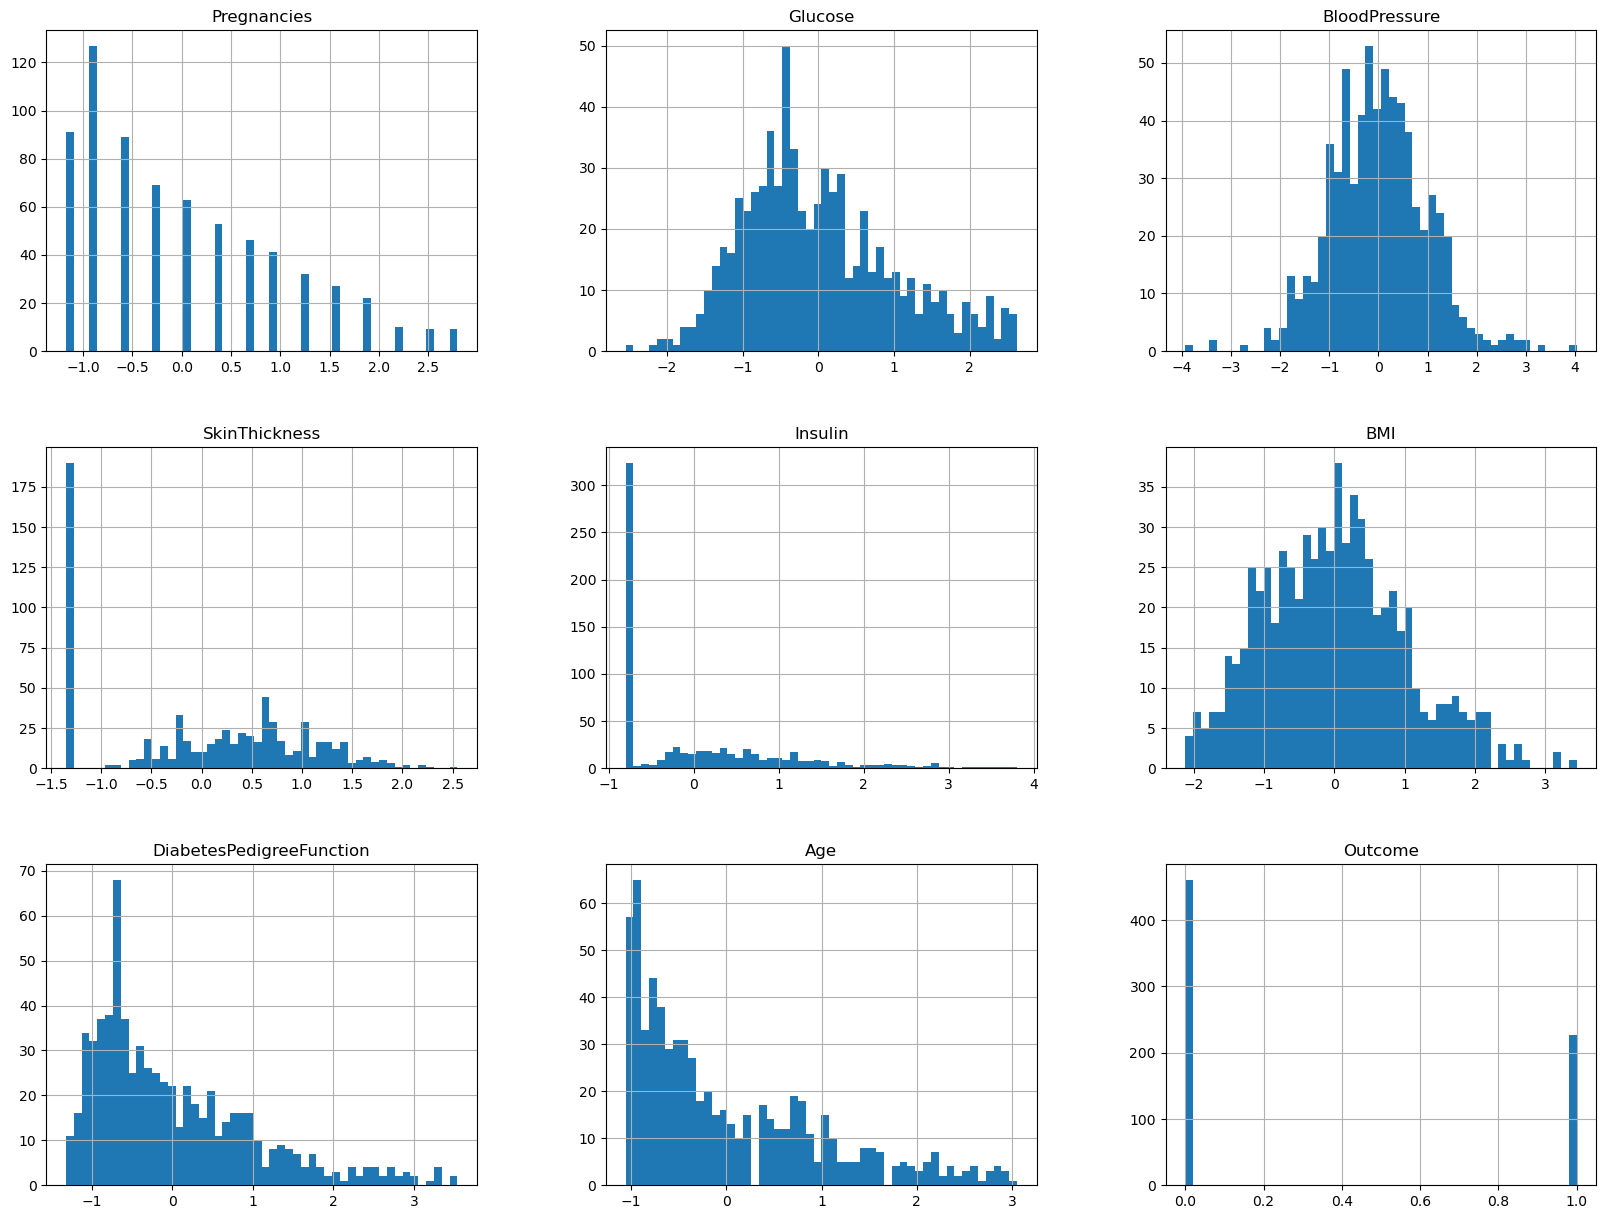

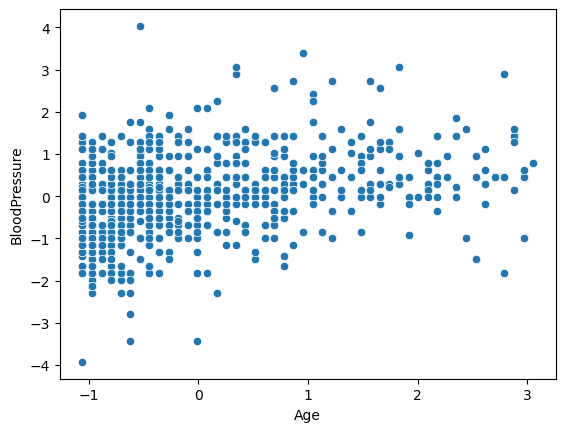

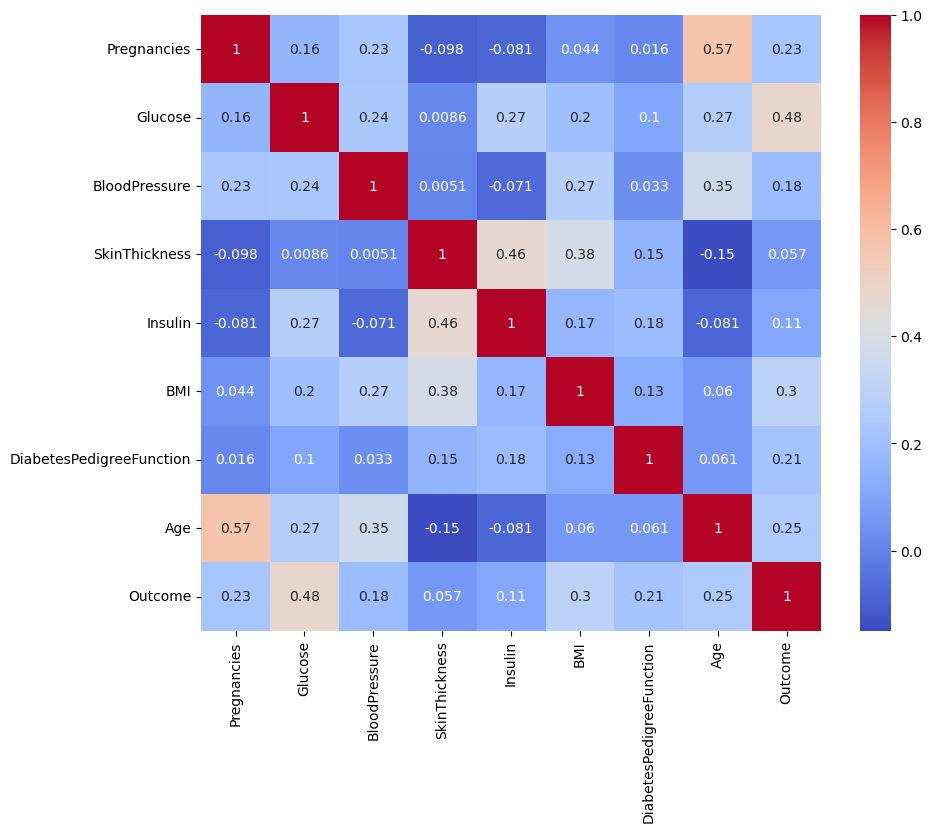

In [35]:
#After the Feature Scaling 
#Ddiabetes_data

diabetes_data_scaled.hist(bins=50, figsize=(20, 15))
plt.show()

sns.scatterplot(x='Age', y='BloodPressure', data=diabetes_data_scaled)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_data_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()

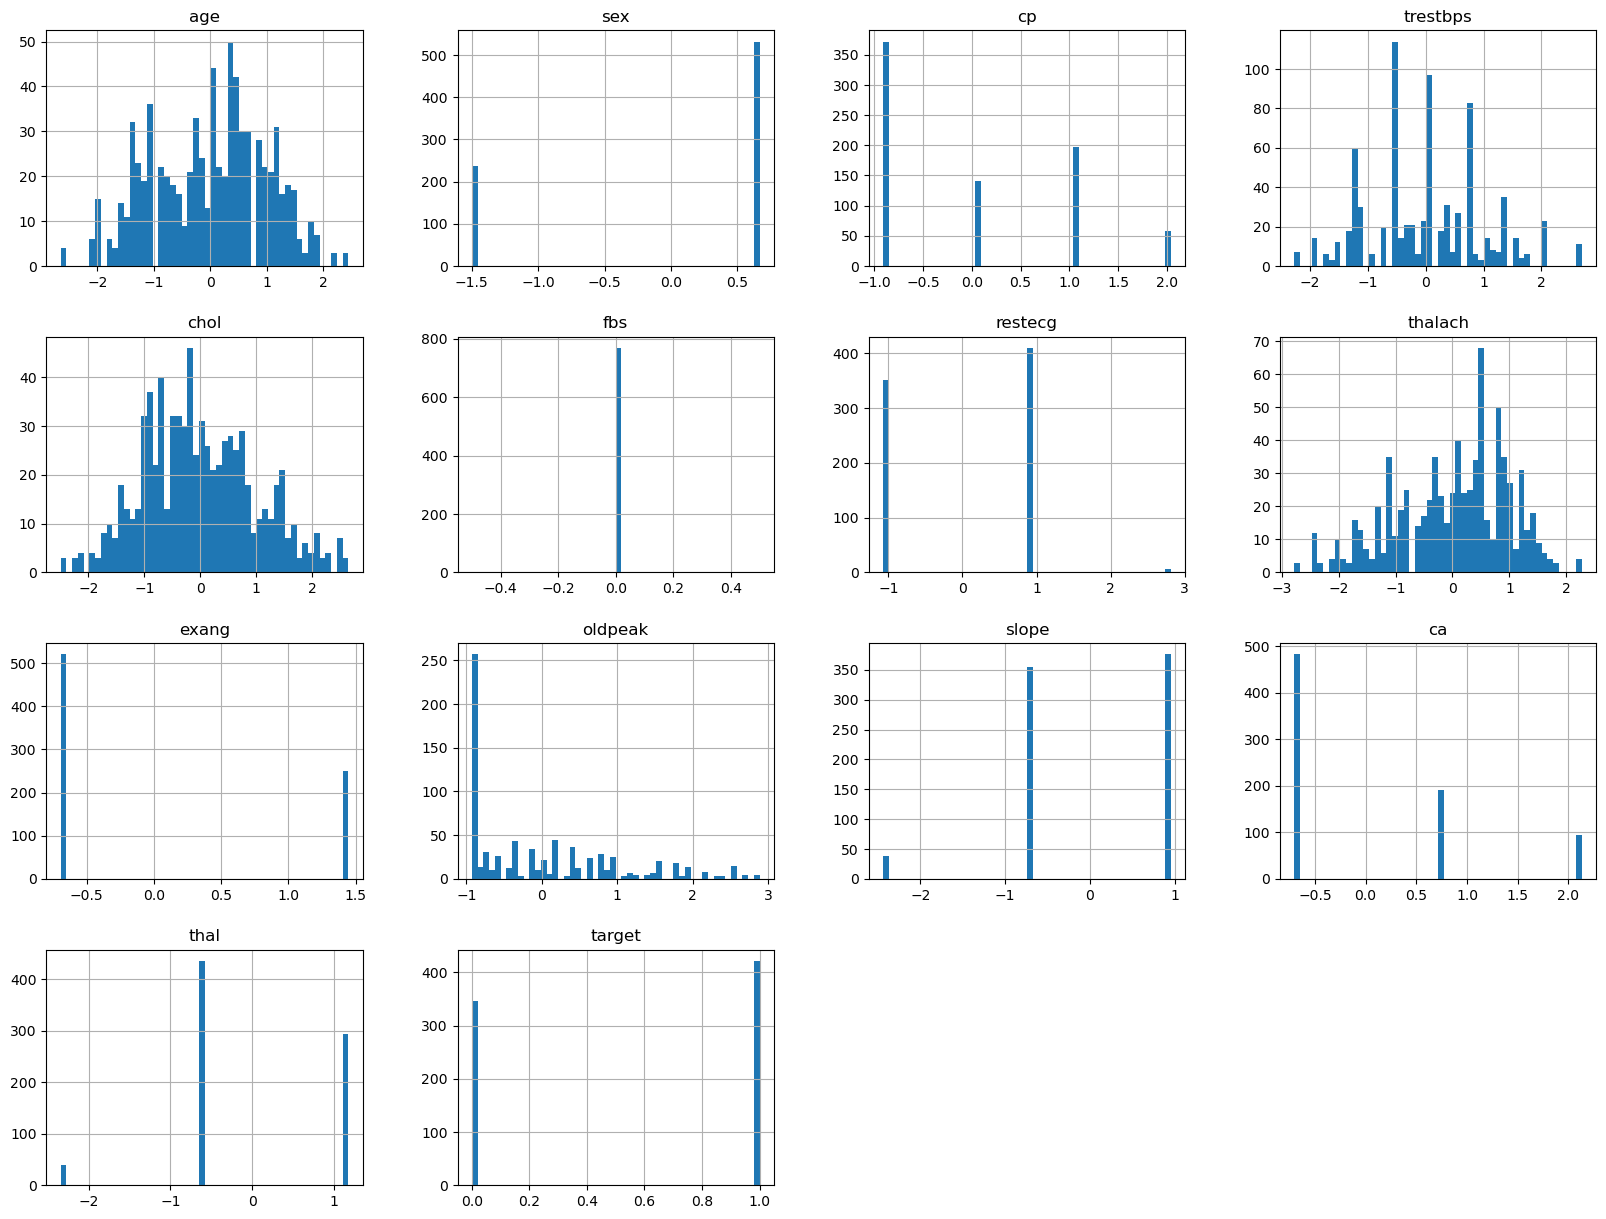

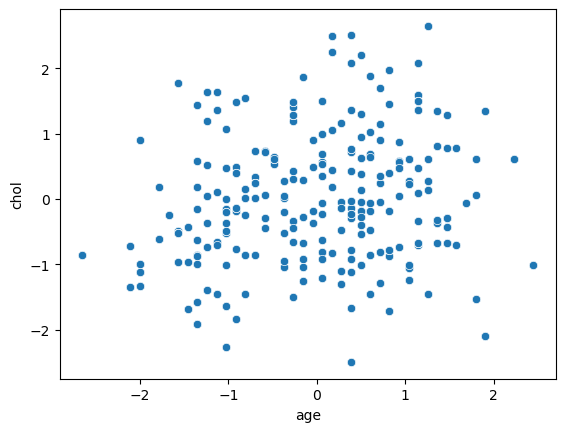

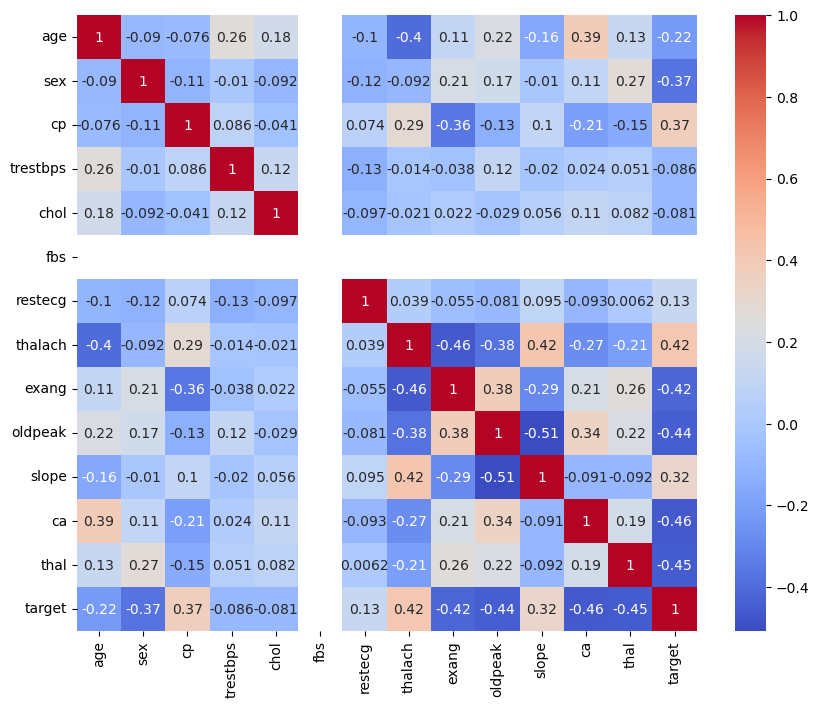

In [36]:
## Heart Dataset

heart_data_scaled.hist(bins=50, figsize=(20, 15))
plt.show()

sns.scatterplot(x='age', y='chol', data=heart_data_scaled)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(heart_data_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()

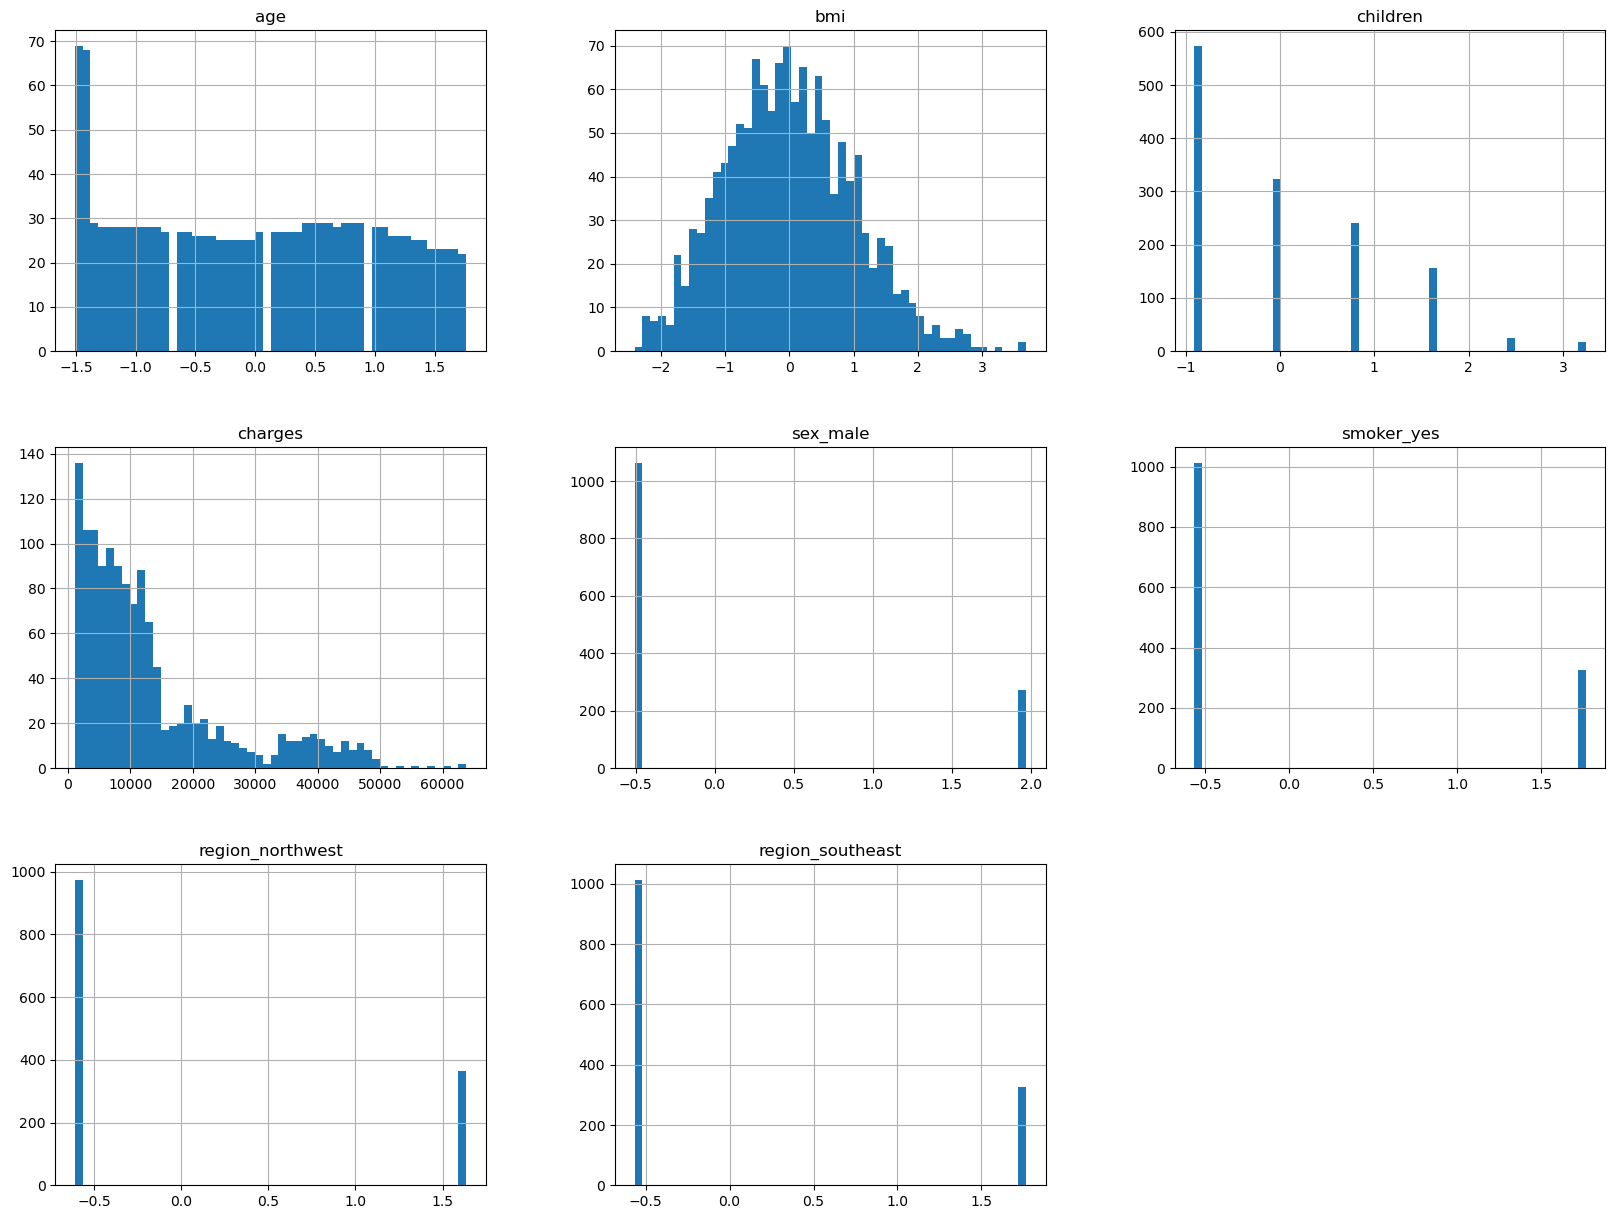

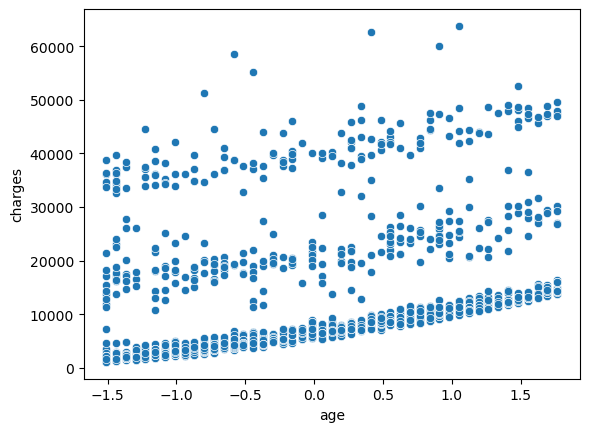

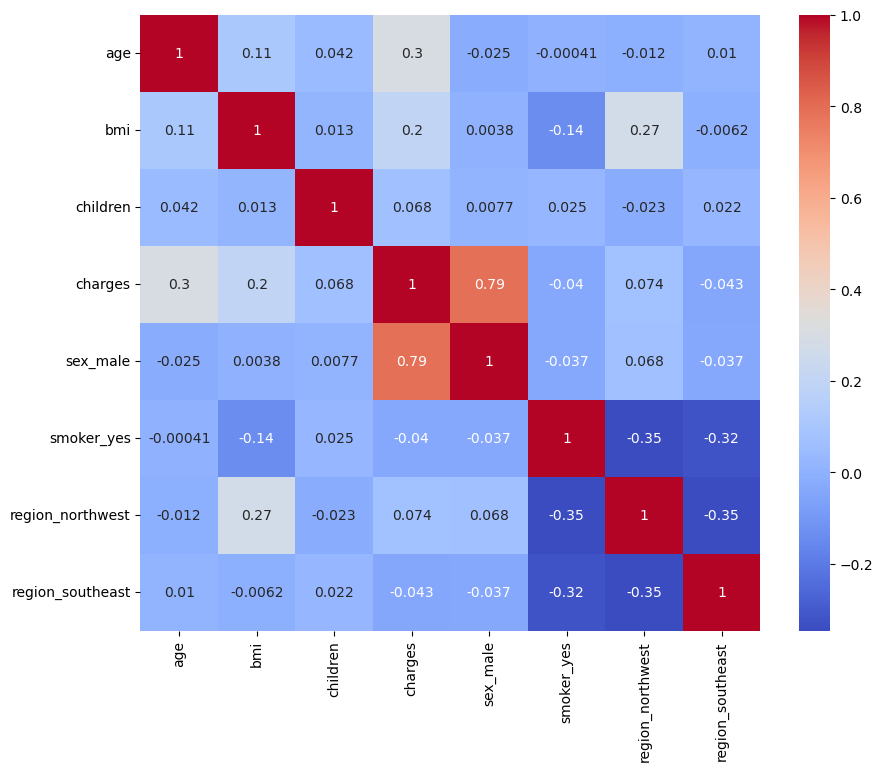

In [37]:
insurance_data_scaled.hist(bins=50, figsize=(20, 15))
plt.show()

sns.scatterplot(x='age', y='charges', data=insurance_data_scaled)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(insurance_data_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()

K-Nearest Neighbors (KNN) for Diabetes Dataset

In [38]:
# K-Nearest Neighbors (KNN) for Diabetes Dataset
## Split data
X = diabetes_data_scaled.drop('Outcome', axis=1)
y = diabetes_data_scaled['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
## Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
## Evaluate model
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[71 14]
 [28 25]]
              precision    recall  f1-score   support

           0       0.72      0.84      0.77        85
           1       0.64      0.47      0.54        53

    accuracy                           0.70       138
   macro avg       0.68      0.65      0.66       138
weighted avg       0.69      0.70      0.68       138



In [41]:
## Hyperparameter Tuning
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'n_neighbors': 5}


In [42]:
# Apply AGNES clustering
agnes = AgglomerativeClustering(n_clusters=3)
clusters = agnes.fit_predict(insurance_data_scaled.drop('charges', axis=1))

In [43]:
# Add cluster labels to the dataset
insurance_data_scaled['Cluster'] = clusters


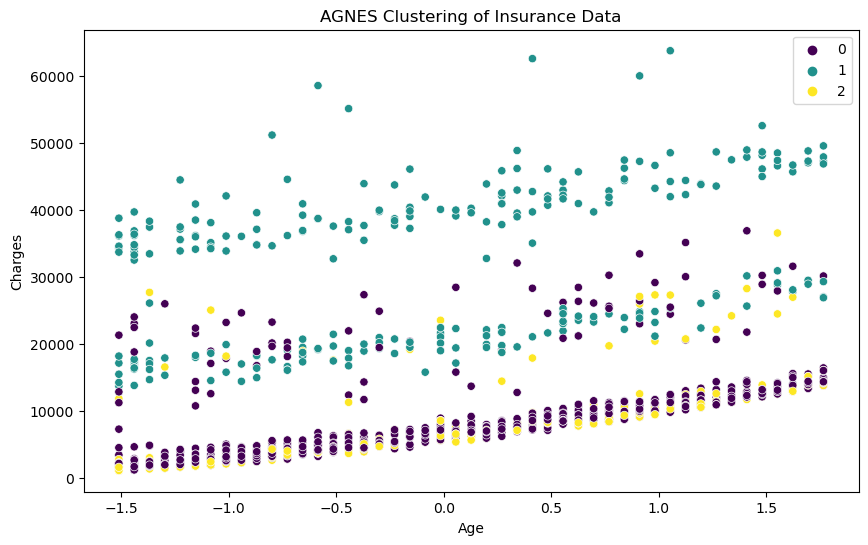

In [44]:

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='Cluster', data=insurance_data_scaled, palette='viridis')
plt.title('AGNES Clustering of Insurance Data')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

In [45]:
# Linear Regression for Medical Cost Dataset
## Split data
X = insurance_data_scaled.drop(['charges', 'Cluster'], axis=1)
y = insurance_data_scaled['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
## Train linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = lin_reg.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

Mean Squared Error: 33602504.508081295
R-squared: 0.7835569786290855


In [48]:
#Evaluate Linear Regression model using additional metrics
print(f'Mean Absolute Error: {mean_squared_error(y_test, y_pred, squared=False)}')



Mean Absolute Error: 5796.766728796432


In [49]:
#Heart Dataset: KNN Classification
X = heart_data_scaled.drop('target', axis=1)
y = heart_data_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Heart Dataset - KNN Classification")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Heart Dataset - KNN Classification
Confusion Matrix:
[[54 10]
 [10 80]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        64
           1       0.89      0.89      0.89        90

    accuracy                           0.87       154
   macro avg       0.87      0.87      0.87       154
weighted avg       0.87      0.87      0.87       154



ROC-AUC Score: 0.9671875


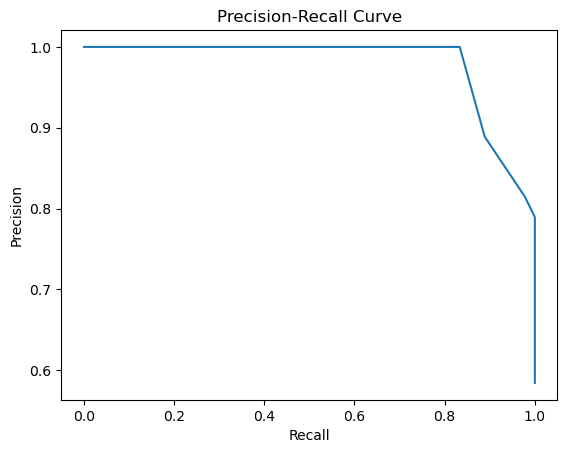

In [50]:
#Model Evaluation
#Evaluate KNN model using additional metrics

y_prob = knn.predict_proba(X_test)[:, 1]
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob)}")
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [51]:
#Insurance Dataset: Linear Regression
print("Insurance Dataset - Linear Regression")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')
print(f'Mean Absolute Error: {mean_squared_error(y_test, y_pred, squared=False)}')

Insurance Dataset - Linear Regression
Mean Squared Error: 0.12987012987012986
R-squared: 0.4652777777777778
Mean Absolute Error: 0.3603749850782236


In [52]:
#Conclusion and Insights
#Diabetes Dataset: KNN Classification
print("Diabetes Dataset - KNN Classification")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob)}")

Diabetes Dataset - KNN Classification
Confusion Matrix:
[[54 10]
 [10 80]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        64
           1       0.89      0.89      0.89        90

    accuracy                           0.87       154
   macro avg       0.87      0.87      0.87       154
weighted avg       0.87      0.87      0.87       154

ROC-AUC Score: 0.9671875


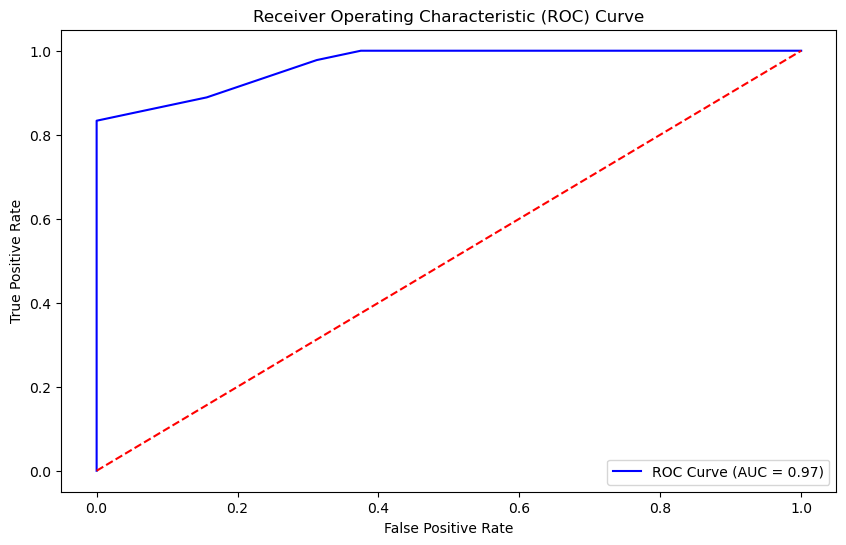

In [53]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, roc_auc_score, classification_report

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

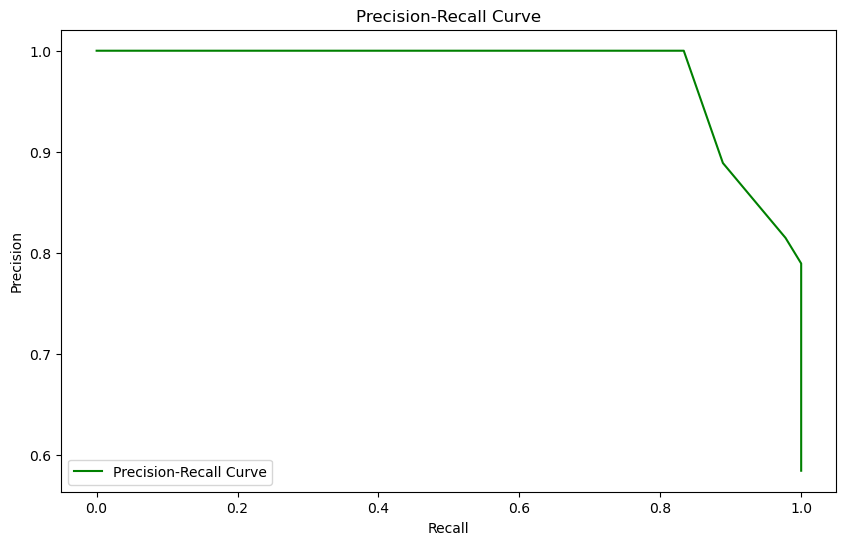

In [54]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

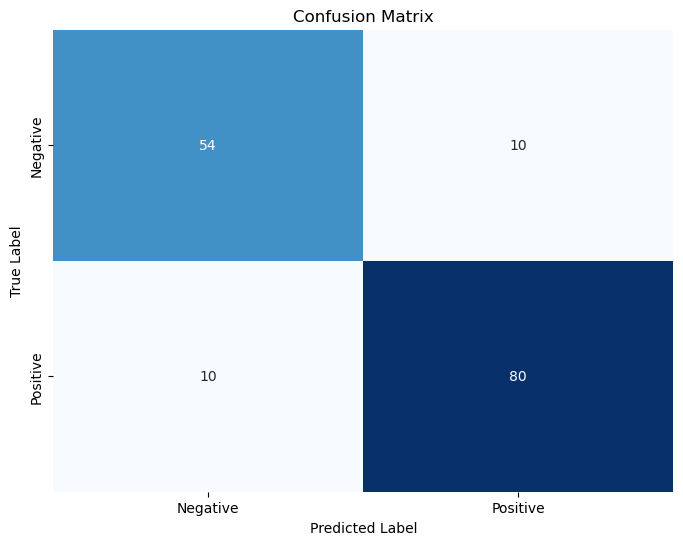

In [55]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [56]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        64
           1       0.89      0.89      0.89        90

    accuracy                           0.87       154
   macro avg       0.87      0.87      0.87       154
weighted avg       0.87      0.87      0.87       154



Conclusion

This project successfully demonstrated the ability to detect diseases, cluster patient profiles for insurance policy recommendations, and predict medical costs using various machine learning techniques. Each step from data cleaning, EDA, model training, and evaluation provides insights into how patient data can be utilized effectively.